In [6]:
%matplotlib inline

In [7]:
!pip install matplotlib seaborn pandas


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import ast

#### Load Pareto into memory

In [43]:
df = pd.read_csv('../pareto_fill.csv')
df_a = pd.read_csv('../CSVs_FINAL_2/pareto_scores_250.csv')
df_a.head()

,Unnamed: 0,objective_1_work,objective_2_distance,objective_2_similarity,genotype
0,0,150037.238073,6.177125,10.647928,"[0.08948933158811138, -2.5, 0.0649741607794793..."
1,1,155692.408411,13.651589,10.523932,"[-0.08509615969272608, -2.2233970799110367, 0...."
2,2,163394.023531,0.000000,10.152818,"[0.06508526059911483, 1.7527391859363888, -1.6..."
3,3,204521.050450,29.341540,11.937856,"[0.4473038978857914, -1.3132722582773309, -0.9..."
4,4,231674.618268,15.793970,11.154809,"[0.4331001106937842, -0.3211214365173276, -0.4..."


#### Simulate each genotype and produce evaluation charts using similarity, distance, work
This part was moved to `pareto_fill.py` because of jupyter notebook complications

#### Plot each genotype alongside the synthesized distance metric

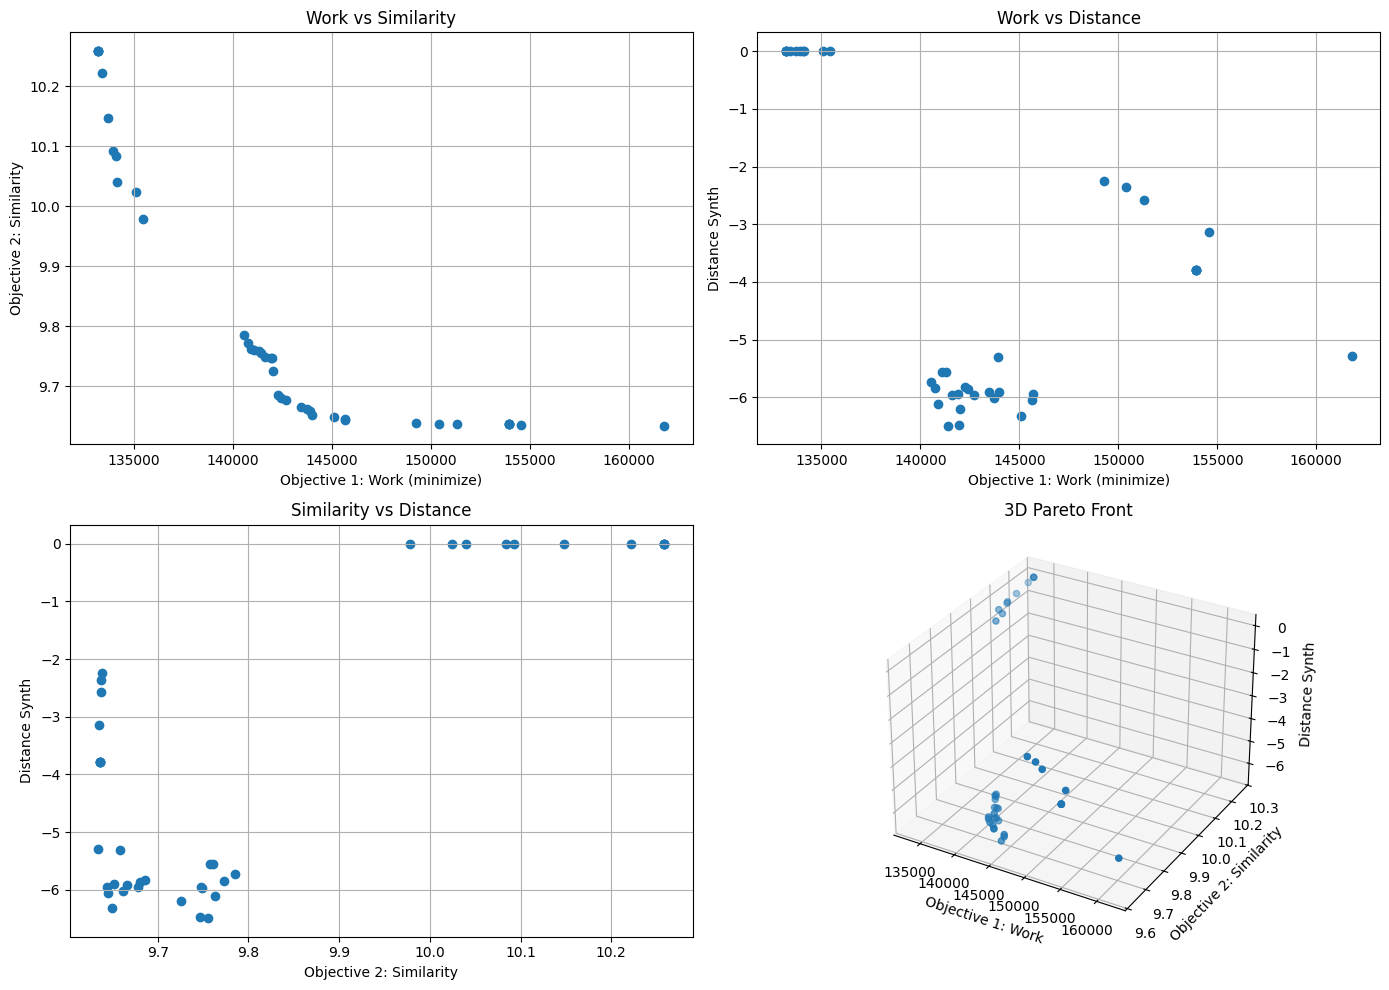

In [ ]:
fig = plt.figure(figsize=(14, 10))

# Chart 1: Work vs Similarity
ax1 = fig.add_subplot(2, 2, 1)
ax1.scatter(df['objective_1_work'], df['objective_2_similarity'])
ax1.set_xlabel('Objective 1: Work (minimize)')
ax1.set_ylabel('Objective 2: Similarity')
ax1.set_title('Work vs Similarity')
ax1.grid(True)
ax1.ticklabel_format(style='plain')

# Chart 2: Work vs Distance
ax2 = fig.add_subplot(2, 2, 2)
ax2.scatter(df['objective_1_work'], df['distance_synth'])
ax2.set_xlabel('Objective 1: Work (minimize)')
ax2.set_ylabel('Distance Synth')
ax2.set_title('Work vs Distance')
ax2.grid(True)
ax2.ticklabel_format(style='plain')

# Chart 3: Similarity vs Distance
ax3 = fig.add_subplot(2, 2, 3)
ax3.scatter(df['objective_2_similarity'], df['distance_synth'])
ax3.set_xlabel('Objective 2: Similarity')
ax3.set_ylabel('Distance Synth')
ax3.set_title('Similarity vs Distance')
ax3.grid(True)
ax3.ticklabel_format(style='plain')

# Chart 4: 3D Scatter of all three objectives
ax4 = fig.add_subplot(2, 2, 4, projection='3d')
ax4.scatter(
    df['objective_1_work'],
    df['objective_2_similarity'],
    df['distance_synth']
)
ax4.set_xlabel('Objective 1: Work')
ax4.set_ylabel('Objective 2: Similarity')
ax4.set_zlabel('Distance Synth')
ax4.set_title('3D Pareto Front')

plt.tight_layout()
plt.show()

#### Best Of 2-Objective (Work, Similarity)

In [53]:
best_work = df.loc[df['objective_1_work'].idxmin()]['genotype']
best_similarity = df.loc[df['objective_2_similarity'].idxmin()]['genotype']
print(f"Best Work: {best_work}")
print(f"Best Similarity: {best_similarity}")
print(f"Best Distance: {df.loc[df['distance_synth'].idxmax()]['genotype']}")

Best Work: [-0.21502554459294088, -0.665451031074371, 0.08181128118554876, 0.015561240881166234, -0.008011677023936126, -0.10230649694892482, -1.0591634112397372, -0.44937803608672366, 1.2567705844166603]
Best Similarity: [-0.04090435563852547, -0.6140823344399962, 0.9002298426797666, -0.7824496703295885, -0.05915835461763462, -0.30210428364026776, -1.1263395512452896, -0.4227983186554783, 1.2266342948526916]
Best Distance: [-0.21502554459294088, -0.665451031074371, 0.08181128118554876, 0.015561240881166234, -0.008011677023936126, -0.10230649694892482, -1.0591634112397372, -0.44937803608672366, 1.2567705844166603]


In [51]:
target = np.mean([ast.literal_eval(best_work), ast.literal_eval(best_similarity)], axis=0)

df['distance_to_middle'] = df['genotype'].apply(lambda g: np.linalg.norm(np.array(ast.literal_eval(g)) - target))

middle_genotype = df.loc[df['distance_to_middle'].idxmin()]

print("Mean/Middle Genotype")
middle_genotype['genotype']

Mean/Middle Genotype


'[-0.04090435563852547, -0.6140823344399962, 0.9002298426797666, -0.7824496703295885, -0.05915835461763462, -0.30210428364026776, -1.1263395512452896, -0.4227983186554783, 1.2266342948526916]'

In [45]:
best_work = df_a.loc[df_a['objective_1_work'].idxmax()]['genotype']
best_similarity = df_a.loc[df_a['objective_2_similarity'].idxmin()]['genotype']
best_distance = df_a.loc[df_a['objective_2_distance'].idxmax()]['genotype']
print(f"Best Work: {best_work}")
print(f"Best Similarity: {best_similarity}")
print(f"Best Distance: {best_distance}")

Best Work: [-0.0607643200043313, 1.222567120364482, 0.008330371810359045, -1.7633456254929925, -0.7205496347862452, -0.3358411892967421, 2.5, -2.275878278780965, -1.1635059795414722]
Best Similarity: [0.06998088668460613, 1.7182917417291659, -0.5185493310881177, -1.7913634932779872, -0.5716137209041592, -0.2886826285456975, -0.8905779738522697, -1.2680445157531144, -1.4146956437555909]
Best Distance: [-0.0607643200043313, 1.222567120364482, 0.008330371810359045, -1.7633456254929925, -0.7205496347862452, -0.3358411892967421, 2.5, -2.275878278780965, -1.1635059795414722]


In [52]:
target = np.mean([ast.literal_eval(best_work), ast.literal_eval(best_similarity), ast.literal_eval(best_distance)], axis=0)

df_a['distance_to_middle'] = df_a['genotype'].apply(lambda g: np.linalg.norm(np.array(ast.literal_eval(g)) - target))

middle_genotype = df_a.loc[df_a['distance_to_middle'].idxmin()]

print("Mean/Middle genotype")
middle_genotype['genotype']

Mean/Middle genotype


'[-0.027155365926977988, 1.301214533791918, 0.05533097300661997, -1.9666601270117556, -0.41096555478882746, -0.4466202592888595, 1.6449508073636294, -1.709321263924561, -1.2756097159137385]'